# Data Collection

Author: Fangzheng Lyu

This notebook includes the data collection instruction for three dataset used in this training material, including US Census Tract Shapefile data, American Community Survey Data Collection and Twitter data.

## Notebook Outline
- [US Census Tract Shapefile](#census)
- [American Community Survey Data Collection](#socio)
- [Twitter Data](#twitter)

In [33]:
import geopandas as gpd
from matplotlib import pyplot as plt
import csv
from urllib.request import urlopen
import pandas as pd

<a id='census'></a>


## 1. US Census Tract Shapefile

Get the states boundary data

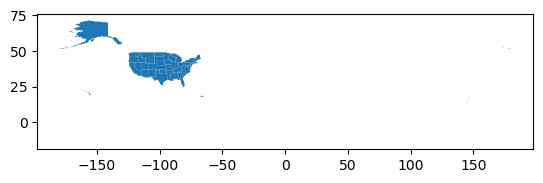

In [7]:
## Data retrieval from US census bureau
## Get the states ID
url_states = r'https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip	'
states = gpd.read_file(url_states)
states.plot()
plt.show()

In [10]:
## show some of the results
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [18]:
## see the combination of states and their geoid
list(zip(list(states["NAME"]), list(states["GEOID"])))

[('West Virginia', '54'),
 ('Florida', '12'),
 ('Illinois', '17'),
 ('Minnesota', '27'),
 ('Maryland', '24'),
 ('Rhode Island', '44'),
 ('Idaho', '16'),
 ('New Hampshire', '33'),
 ('North Carolina', '37'),
 ('Vermont', '50'),
 ('Connecticut', '09'),
 ('Delaware', '10'),
 ('New Mexico', '35'),
 ('California', '06'),
 ('New Jersey', '34'),
 ('Wisconsin', '55'),
 ('Oregon', '41'),
 ('Nebraska', '31'),
 ('Pennsylvania', '42'),
 ('Washington', '53'),
 ('Louisiana', '22'),
 ('Georgia', '13'),
 ('Alabama', '01'),
 ('Utah', '49'),
 ('Ohio', '39'),
 ('Texas', '48'),
 ('Colorado', '08'),
 ('South Carolina', '45'),
 ('Oklahoma', '40'),
 ('Tennessee', '47'),
 ('Wyoming', '56'),
 ('Hawaii', '15'),
 ('North Dakota', '38'),
 ('Kentucky', '21'),
 ('United States Virgin Islands', '78'),
 ('Commonwealth of the Northern Mariana Islands', '69'),
 ('Guam', '66'),
 ('Maine', '23'),
 ('New York', '36'),
 ('Nevada', '32'),
 ('Alaska', '02'),
 ('American Samoa', '60'),
 ('Michigan', '26'),
 ('Arkansas', '05'),

<Axes: >

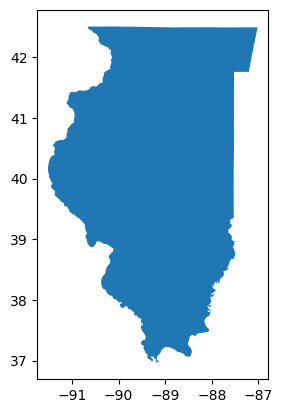

In [29]:
## look into the shape for states Illinois
states[states["GEOID"] == "17"].plot()

The United States is divided into county subdivisions in addition to states. A county is a specific geographic area within a state that has its own local government to handle certain administrative and public services.

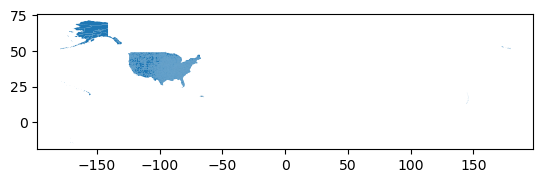

In [42]:
## Retrieved the county boundary for US

url_county = r'https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip	'
county = gpd.read_file(url_county)
county.plot()
plt.show()

In [44]:
## Show counties
county

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103886891,12283371,+34.6905055,-084.4546244,"POLYGON ((-84.65478 34.66559, -84.65488 34.669..."
3229,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329471929,16913419,+48.7610683,-095.8215042,"POLYGON ((-96.40466 48.80528, -96.40467 48.813..."
3230,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1850602740,71274123,+32.6343703,-090.0341603,"POLYGON ((-90.09363 32.70763, -90.09360 32.707..."
3231,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039143,8841783,+32.3034298,-101.4387208,"POLYGON ((-101.69227 32.27106, -101.69221 32.2..."


<Axes: >

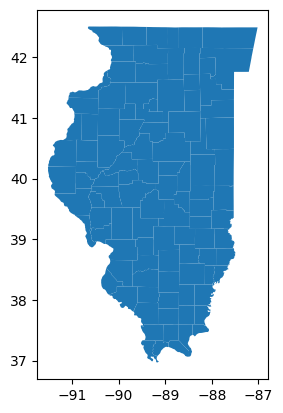

In [47]:
## look into the shape for counties Illinois
county[county["STATEFP"] == "17"].plot()

<Axes: >

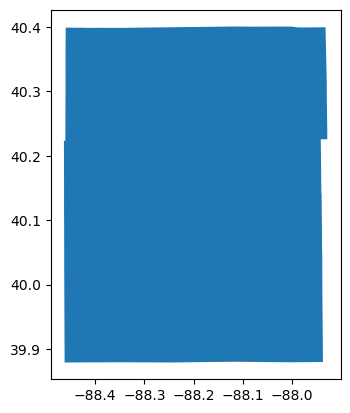

In [51]:
## look at the Chamapaign County in Illinois
il_county = county[county["STATEFP"] == "17"]
il_county[il_county["NAME"] == "Champaign"].plot()

In [53]:
il_county[il_county["NAME"] == "Champaign"]

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2621,17,019,00424211,17019,Champaign,Champaign County,06,H1,G4020,None,16580,None,A,2579920046,6088510,+40.1389845,-088.1969749,"POLYGON ((-88.46317 40.14220, -88.46322 40.143..."


A census tract is a specifically defined geographic region used for collecting census data. These areas are sometimes aligned with the boundaries of cities, towns, or other administrative divisions, and multiple census tracts typically exist within a county. In unincorporated areas of the United States, the boundaries of these census regions are often arbitrary, except when they follow existing political boundary lines.

Census tracts represent the smallest territorial entity for which population data are available in many countries. In the United States, census tracts are subdivided into block groups and census blocks. Census tracts are "designed to be relatively homogeneous units with respect to population characteristics, economic status, and living conditions" and "average about 4,000 inhabitants".

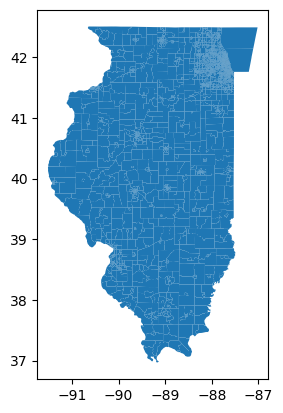

In [19]:
## Retrieved the census tract boundary for Illinois
## tl_2019_{state_id}_tract.zip
## changes state_id to switch to another states

url_il = r'https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_17_tract.zip'
il = gpd.read_file(url_il)
il.plot()
plt.show()

In [30]:
il.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,091,011700,17091011700,117,Census Tract 117,G5020,S,2370100,102060,+41.1294653,-087.8735796,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17,091,011800,17091011800,118,Census Tract 118,G5020,S,1791332,55670,+41.1403452,-087.8760059,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17,119,400951,17119400951,4009.51,Census Tract 4009.51,G5020,S,5169973,169066,+38.7277628,-090.1002620,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."
3,17,119,400952,17119400952,4009.52,Census Tract 4009.52,G5020,S,5751299,305906,+38.7301416,-090.0827783,"POLYGON ((-90.09442 38.72031, -90.09360 38.720..."
4,17,135,957500,17135957500,9575,Census Tract 9575,G5020,S,450037682,512225,+39.3934535,-089.5975234,"POLYGON ((-89.70369 39.34803, -89.69928 39.348..."


<a id='socio'></a>

## 2. American Community Survey Data Collection

The American Community Survey (ACS) is an ongoing survey conducted by the United States Census Bureau. It provides vital information on a yearly basis about the nation's population, housing, workforce and etc. The ACS collects detailed demographic, social, economic, and housing data from a representative sample of households across the United States.

To understand the meaning of each code, downtown the [table](https://www2.census.gov/programs-surveys/acs/tech_docs/table_shells/table_lists/2018_DataProductList.xlsx)

And this example use 2018 5-year ACE data as an example, and retrieve the total population, black, white, hispanic, asian, income value. Users can adjust/modify the value based on what is needed. And this example conduct county-level data collection and analysis.

In [20]:
## Forming template
## Get social economic data
## example for retrieveing 2018 acs data using API
def get_url(state_id):
    ## Total population, black, white, hispanic, asian, income
    
    s1_t = "https://api.census.gov/data/2018/acs/acs5?get=B02001_001E,B02001_003E,B02001_002E,B03001_003E,B02001_005E,B25105_001E&for=county:*&in=state:"
    
    s_state = str(state_id)
    if (len(s_state)==1):
        s_state = "0"+s_state
    return [s1_t+s_state]
state_id = [1,2,4,5,6,8,9,10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56,72]

In [32]:
!mkdir ./rt
for i in range(0, len(state_id)):
    state_url = get_url(state_id[i])
    curr_id = state_id[i]
    head_rt = []
    data_rt = []

    link = state_url[0]
    #print("Currently on state ID " + str(state_id[i]))
    ## print(link)
    f = urlopen(link)
    myfile = f.read()
    myfile = str(myfile)
    data = myfile.split("\\n")
    head = data[0].split(",")
    head[0] = head[0][4:]
    head = head[:-1]
    #print(head)
    head[-1]=head[-1][:-1]
    data = data[1:]
    data_arr = []
    for i in range(0, len(data)):
        curr_arr = data[i].split(",")[:-1]
        curr_arr[0]=curr_arr[0][1:]
        curr_arr[-1]=curr_arr[-1][:-1]
        for j in range(0, len(curr_arr)):
            curr_arr[j]=curr_arr[j]
        data_arr.append(curr_arr)
    head_rt = head[-3:]+head[:-3]
    for i in range(0,len(data_arr)):
        curr_arr = data_arr[i]
        data_rt.append(curr_arr[-3:]+curr_arr[:-3])
    link = state_url[0]
    ## print(link)
    f = urlopen(link)
    myfile = f.read()
    myfile = str(myfile)
    data = myfile.split("\\n")
    head = data[0].split(",")
    head[0] = head[0][4:]
    head = head[:-1]
    head[-1]=head[-1][:-1]
    data = data[1:]
    data_arr = []
    for i in range(0, len(data)):
        curr_arr = data[i].split(",")[:-1]
        curr_arr[0]=curr_arr[0][1:]
        curr_arr[-1]=curr_arr[-1][:-1]
        for j in range(0, len(curr_arr)):
            curr_arr[j]=curr_arr[j]
        data_arr.append(curr_arr)
    head_rt = head_rt+head[:-3]
    for i in range(0,len(data_arr)):
        #print(len(curr_arr))
        curr_arr = data_arr[i]
        data_rt[i]=data_rt[i]+curr_arr[:-3]
    for i in range(0,len(data_rt)):
        for j in range(0,len(data_rt[i])):
            #print(str(i)+" "+str(j))
            if (data_rt[i][j]!="null"):
                data_rt[i][j]=data_rt[i][j][1:-1]
        
    filename = "rt/data_state_"+str(curr_id)+".csv"
    print(filename)
    final_rt = []
    final_rt.append(head_rt)
    for i in range(0, len(data_rt)):
        final_rt.append(data_rt[i])
    with open(filename,"w+") as my_csv:
        csvWriter = csv.writer(my_csv)
        csvWriter.writerows(final_rt)

rt/data_state_1.csv
rt/data_state_2.csv
rt/data_state_4.csv
rt/data_state_5.csv
rt/data_state_6.csv
rt/data_state_8.csv
rt/data_state_9.csv
rt/data_state_10.csv
rt/data_state_12.csv
rt/data_state_13.csv
rt/data_state_15.csv
rt/data_state_16.csv
rt/data_state_17.csv
rt/data_state_18.csv
rt/data_state_19.csv
rt/data_state_20.csv
rt/data_state_21.csv
rt/data_state_22.csv
rt/data_state_23.csv
rt/data_state_24.csv
rt/data_state_25.csv
rt/data_state_26.csv
rt/data_state_27.csv
rt/data_state_28.csv
rt/data_state_29.csv
rt/data_state_30.csv
rt/data_state_31.csv
rt/data_state_32.csv
rt/data_state_33.csv
rt/data_state_34.csv
rt/data_state_35.csv
rt/data_state_36.csv
rt/data_state_37.csv
rt/data_state_38.csv
rt/data_state_39.csv
rt/data_state_40.csv
rt/data_state_41.csv
rt/data_state_42.csv
rt/data_state_44.csv
rt/data_state_45.csv
rt/data_state_46.csv
rt/data_state_47.csv
rt/data_state_48.csv
rt/data_state_49.csv
rt/data_state_50.csv
rt/data_state_51.csv
rt/data_state_53.csv
rt/data_state_54.csv

In [34]:
## Read csv file
df = pd.DataFrame(columns=['state', 'county', 'pop', 'black', 'white', 'asian', 'hispanic', 'income'])

In [35]:
df

,state,county,pop,black,white,asian,hispanic,income


Calculate the total population, income percentage of black, white, asian and hispanic population by census tract

In [38]:
state_code = [1,2,4,5,6,8,9,10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56,72]
for code in state_code:
    print(code)
    filepath = "rt/data_state_"+str(code)+".csv"

    state = pd.read_csv(filepath)


    pop = state['"B02001_001E"'][:-1]
    black = state['"B02001_003E"'][:-1]
    white = state['"B02001_002E"'][:-1]
    asian = state['"B02001_005E"'][:-1]
    hispanic = state['"B03001_003E"'][:-1]
    income = state['"B25105_001E"'][:-1]
    state_id = state['"state"'][:-1]
    county = state['"county"'][:-1]

    temp= pd.DataFrame(columns=['state', 'county', 'pop', 'black', 'white', 'asian', 'hispanic', 'income'])
    temp['state']=state_id
    temp['county']=county
    temp['pop'] = pop
    temp['black'] = black/pop
    temp['white'] = white/pop
    temp['asian'] = asian/pop
    temp['hispanic'] = hispanic/pop
    temp['income'] = income

    df = pd.concat([df, temp], ignore_index=True)

1
2
4
5
6
8
9
10
12
13
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
44
45
46
47
48
49
50
51
53
54
55
56
72


Show the result

In [39]:
df

,state,county,pop,black,white,asian,hispanic,income
0,1,115,87306,0.094518,0.873067,0.008442,0.023927,779
1,1,43,82313,0.012124,0.952365,0.004058,0.043043,671
2,1,69,104352,0.269070,0.693681,0.008366,0.032937,736
3,1,125,206213,0.316469,0.644368,0.016013,0.036065,891
4,1,31,51288,0.172146,0.758910,0.012985,0.069197,739
...,...,...,...,...,...,...,...,...
3163,72,47,34165,0.064920,0.796371,0.000000,0.989639,230
3164,72,95,11023,0.729293,0.254649,0.000000,0.988479,197
3165,72,113,143926,0.054431,0.773856,0.000660,0.993483,272
3166,72,131,37964,0.028738,0.702718,0.002766,0.977953,222


<a id='twitter'></a>

## 3. Twitter Data